<a href="https://colab.research.google.com/github/Jit562/covid-19-sentiment-analysis/blob/main/covid_19_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name -**Covid-19 Sentiment Analysis : Coronavirus Tweet Sentiment Analysis.



**Project Type** - Classification/Supervised Learning

**Contribution** - Individual

**Team Member** - 1

**BY-Jitendra Prasad** (jitendra.mits2@gmail.com)

## **Project Summary** :-  Sentiment Analysis in Coronavirus Tweet Sentiment Analysis

Sentiment analysis aims to determine a writer’s attitude towards a topic or the overall contextual polarity of a document. The attitude can be his judgment or assessment, his emotional state or the intended emotional communication.

In sentiment analysis, the main task is to identify opinion words, which is very important. Opinion words are dominant indicators of feelings, especially adjectives, adverbs, and verbs, for example: “I love this camera. It’s amazing!”

Opinion words are also known as polarity words, sentiment words, opinion lexicon, or opinion words, which can generally be divided into two types: positive words, for example, wonderful. , elegant, astonishing; and negative words, eg horrible, disgusting, poor.

## **GitHub Link -**

## **Problem Statement-**
After reading the dataset which contains 41k Covid 19 reviews from Coronavirus Tweet Analysis, we see that there are three prominent columns. One being TEXT which contains the criticism and the other being LABEL which contains the O’s a 1’s and 2's, where 0-NEGATIVE , 1-POSITIVE and 2-Neutral.

##**Key Features of the Covid-19 Dataset:-**

**Column Details**

* **Username:** Tweet on covid sentiment user

* **ScreenName:** Tweet on covid sentiment Screen

* **Location:** Country name and city

* **TweetAt:** Date and time Tweet

* **OriginalTweet:** The user thought tweet about the covid

* **Sentiment:** Positive, Negetive, Neutral ( Which type of tweet through user )

## **General Guidelines : -**

1. Well-structured, formatted, and commented code is required.

2. Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

The additional credits will have advantages over other students during Star Student selection.

    [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
              without a single error logged. ]
3. Each and every logic should have proper comments.

4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.

# Chart visualization code
        
*  Why did you pick the specific chart?
*  What is/are the insight(s) found from the chart?
*  Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
5. You have to create at least 15 logical & meaningful charts having important insights.

[ Hints : - Do the Vizualization in a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis ]

6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.
* Explain the ML Model used and it's performance using Evaluation metric Score Chart.

* Cross- Validation & Hyperparameter Tuning

* Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

## **Let's Begin !**

**1. Know Your Data**

**Import Libraries**

Data Preprocessing, cleaning and EDA

In [4]:
!pip install catboost

In [5]:
# data Clean and Visualization Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


# data Preprocesing library
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Data Vectorizer or feauture extraction Library
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Data Similarity Library
from sklearn.metrics.pairwise import cosine_similarity

# data Extract Library
from sklearn.model_selection import train_test_split

#Check Accurracy model library
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# data Scaling library
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, PolynomialFeatures

#data missing value haldle library
from sklearn.impute import SimpleImputer

# machine Learning Classifiction Model Library
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Model validation Library
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#Pipeline Library
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


## **Load dataset**

In [7]:
# Data Load
df = pd.read_csv('/content/drive/MyDrive/Dataset/Classification_data/Copy of Coronavirus Tweets.csv',  encoding='latin-1')

## Dataset First View

In [8]:
# Check the top 5 data
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [9]:
# Check the below 5 data
df.tail(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [10]:
# Check the random data
df.sample(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
15314,19113,64065,"Manchester, England",22-03-2020,#HappyMothersDay2020 \r\r\n#SelfIsolation \r\r...,Extremely Negative
1731,5530,50482,"Kingston, Ontario, Canada",17-03-2020,Oil Demand May Plunge By 10 Million Barrels Pe...,Negative
5966,9765,54717,"Missouri, USA",19-03-2020,END OF DAYS SALE!!!! Have you always wanted a ...,Extremely Positive
28217,32016,76968,NaN,04-04-2020,Just got back from the supermarket. There was ...,Negative
13383,17182,62134,"Leicester, England",21-03-2020,Extortionate car park charges at Stansted Airp...,Negative


## Dataset Rows & Columns count

In [11]:
# Check data columns and row
df.shape

(41157, 6)

In [12]:
# Total number of rows
total_rows = df.shape[0]

# Total Columns

total_columns = df.shape[1]

print(f"Total number of rows: {total_rows}")
print(f"Total number of columns: {total_columns}")

Total number of rows: 41157
Total number of columns: 6


41157 Rowa available in the dataset

6 columns are available in the dataset

### Dataset Information

In [13]:
# check the data Inforamtion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


**null values in the dataset**
1. Username and ScreenName are Int64 data type
2. Location, TweetAt, Original_Tweet and Sentiment are objects data type


### Duplicate Values

In [14]:
df.duplicated().sum()

0

No Duplicate value available in the dataset

In [15]:
# check the data Inforamtion for numerical data
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


### Missing Values/Null Values

In [16]:
# Check the data Null values
df.isnull().sum()

,0
UserName,0
ScreenName,0
Location,8590
TweetAt,0
OriginalTweet,0
Sentiment,0


In [17]:
# Total number of rows
total_rows = df.shape[0]

# Number of null values in 'Location' column
null_count = df['Location'].isnull().sum()

# Percentage of null values
null_percentage = (null_count / total_rows) * 100

# Display the result
print(f"Percentage of null values in 'Location': {null_percentage:.2f}%")

# Display the Number of null data
print(f"Number of null values in 'Location': {null_count}")

Percentage of null values in 'Location': 20.87%
Number of null values in 'Location': 8590


Only Location Columns in ( 20% ) missing value

Percentage of null values in 'Location': 20.87%

Number of null values in 'Location': 8590


### Visualizing the missing values

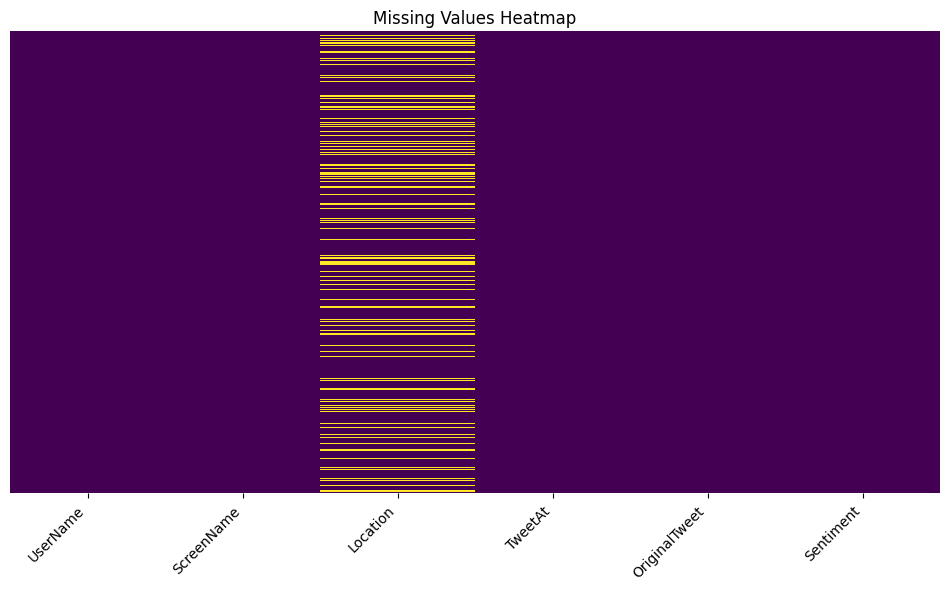

In [18]:
#Set the figger size
plt.figure(figsize=(12, 6))

# Create a heatmap to visualize missing values
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the title
plt.title('Missing Values Heatmap')
plt.show()

### **What did you know about your dataset?**

1. 41157 Rowa available in the dataset
2. 6 columns are available in the dataset
3. null values in the dataset
4. Username and ScreenName are Objects data type
5. Loaction, TweetAt, OriginalTweet and Sentiment are Int64 data type
6. No Duplicate data in the dataset
7. Location Columns in the Missing values or null values in the dataset
8. Percentage of null values in 'Location': 20.87%

9. Number of null values in 'Location': 8590
10. TweetAt data is Datetime data
11. UserName and ScreenName is wrong data

## **Understanding Your Variables**

In [19]:
# check the data columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

### **Column Details**

*  **Username:** Tweet on covid sentiment user

*  **ScreenName:** Tweet on covid sentiment Screen

*  **Location:** Country name and city

*  **TweetAt:** Date and time Tweet

*  **OriginalTweet:** The user thought tweet about the covid

*  **Sentiment:** Positive, Negetive, Neutral  ( Which type of tweet through user )

### **Check the all columns Unique data**

In [20]:
for col in df.columns:
  uq_values = df[col].nunique()
  print(f"Unique values in column {col} : {uq_values}")

Unique values in column UserName : 41157
Unique values in column ScreenName : 41157
Unique values in column Location : 12220
Unique values in column TweetAt : 30
Unique values in column OriginalTweet : 41157
Unique values in column Sentiment : 5


* Unique values in column UserName : 41157
* Unique values in column ScreenName : 41157
* Unique values in column Location : 12220
* Unique values in column TweetAt : 30
* Unique values in column OriginalTweet : 41157
* Unique values in column Sentiment : 3

In [21]:
# check the data world type
df.iloc[0:1, 4:5]

,OriginalTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...


### convert the data Extremely Positive and Extremely Negetive to positive and negetive data

In [22]:
# Create the method to convert Extremely Positive and Extremely Negetive to positive and negetive data
def Sentiment_value(x):
  if x == 'Extremely Positive':
    return "positive"
  elif x == "Positive":
    return "positive"
  elif x == "Extremely Negative":
    return "negative"
  elif x == "Negative":
    return "negative"
  else:
    return "neutral"

In [23]:
# Apply the method to convert positavi and negetive
df['Sentiment'] = df['Sentiment'].apply(Sentiment_value)

In [24]:
# Check the data value counts
df['Sentiment'].value_counts()

,count
Sentiment,
positive,18046
negative,15398
neutral,7713


### Create new data using old dataset

In [25]:
# Create the Anothe data using old data
new_df = df.copy()

### Check the data columns and rows

In [26]:
# Total number of rows
total_rows = new_df.shape[0]

# Total Columns

total_columns = new_df.shape[1]

print(f"Total number of rows: {total_rows}")
print(f"Total number of columns: {total_columns}")

Total number of rows: 41157
Total number of columns: 6


In [27]:
# Check the data columns
new_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

### **Clean the data on Original Tweet**

In [28]:
# Data Clean example = sweet to sweets , or go --> goes same world convert only one world using this method
port_stem = PorterStemmer()

In [29]:
# Data Cleaning using Regular expression
def clean_text(text):
  text = re.sub(r'@\w+|https?://\S+|[^A-Za-z0-9\s]', '', text)
  text = re.sub(r'[\r\n]+', ' ', text)
  text = re.sub(r'[^a-zA-Z]', ' ', text)

  text = text.lower()
  text = text.split()
  text = [port_stem.stem(word) for word in text if not word in stopwords.words('english')]

  text = ' '.join(text)

  return text


In [30]:
# Clean function apply in the Originaltweet data
new_df['OriginalTweet'] = new_df['OriginalTweet'].apply(clean_text)

In [31]:
# Clean data after check using sample method
new_df['OriginalTweet'].sample(10)

,OriginalTweet
26559,global survey consum sentiment coronaviru crisi
40795,fight covid like fight war must weapon suppli ...
7116,stop panic buy mong
23565,summari execut via invas person space dedic hu...
13173,remot commun go without food peopl go hungri b...
12960,bad everi day make new shop list need food im ...
22918,day period govern work suspend timeofus electr...
21078,tamperevid label drive consum confid coronavir...
12758,hand sanit cost per ml govern declar essenti c...
16847,food shop order takeaway onlin covid help girl...


In [32]:
# check the only neutral randomaly data
new_df[new_df['Sentiment']=="neutral"].sample(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
17015,20814,65766,"Chicago, Illinois",23-03-2020,expect ga price plummet covid pandem,neutral
7227,11026,55978,NaN,19-03-2020,franc move stage coronaviruspandem go work go ...,neutral
37385,41184,86136,Everywhere!,10-04-2020,sea consum persona born covid studi,neutral
19361,23160,68112,JDSupra.com,24-03-2020,dc depart consum regulatori affair dcra close ...,neutral
5089,8888,53840,"Fayetteville, Arkansas",18-03-2020,raja kali major suppli demand side disrupt con...,neutral
36612,40411,85363,"Chattanooga, TN",09-04-2020,consum report prevent spread covid laundri,neutral
2996,6795,51747,"San Francisco, CA",18-03-2020,key consum behavior threshold amp impact retail,neutral
4952,8751,53703,"New Delhi, India",18-03-2020,ikea outlet switzerland close march least apri...,neutral
19792,23591,68543,"Naccache, Lebanon",24-03-2020,need chang wash cloth visit groceri store groc...,neutral
23433,27232,72184,"Sydney, Australia",26-03-2020,australian carbon market inocul covid european...,neutral


In [33]:
#Check the Data Information
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [34]:
# check the null values of holl dataset
new_df.isnull().sum()

,0
UserName,0
ScreenName,0
Location,8590
TweetAt,0
OriginalTweet,0
Sentiment,0


In [35]:
# Total number of rows
total_rows = new_df.shape[0]

# Number of null values in 'Location' column
null_count = new_df['Location'].isnull().sum()

# Percentage of null values
null_percentage = (null_count / total_rows) * 100

# Display the result
print(f"Percentage of null values in 'Location': {null_percentage:.2f}%")

# Display the Number of null data
print(f"Number of null values in 'Location': {null_count}")


Percentage of null values in 'Location': 20.87%
Number of null values in 'Location': 8590


### **find Unique Values for each variable.**

In [36]:
for col in new_df.columns:
  uq_values = new_df[col].nunique()
  print(f"Unique values in column {col} : {uq_values}")

Unique values in column UserName : 41157
Unique values in column ScreenName : 41157
Unique values in column Location : 12220
Unique values in column TweetAt : 30
Unique values in column OriginalTweet : 40850
Unique values in column Sentiment : 3


* Unique values in column UserName : 41157
* Unique values in column ScreenName : 41157
* Unique values in column Location : 12220
* Unique values in column TweetAt : 30
* Unique values in column OriginalTweet : 40850
* Unique values in column Sentiment : 3

## **Data Wrangling**

#### Data Wrangling Code

In [37]:
## Convert TweetAt objects data to date and time formate

new_df['TweetAt'] = pd.to_datetime(new_df['TweetAt'])

In [38]:
# Check data type after change
new_df['TweetAt'].dtypes

dtype('<M8[ns]')

#### Extract the year, month, week, quarter

In [39]:
new_df['year'] = new_df['TweetAt'].dt.year # extract the year
new_df['month'] = new_df['TweetAt'].dt.month_name() # extract the month name
new_df['week'] = new_df['TweetAt'].dt.weekday # extract the week
new_df['quarter'] = new_df['TweetAt'].dt.quarter # extract the quarter

In [40]:
## Extract the week name
new_df['week_name'] = new_df['TweetAt'].dt.day_name()

In [41]:
# after Extract the year, month, week
new_df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,year,month,week,quarter,week_name
0,3799,48751,London,2020-03-16,,neutral,2020,March,0,1,Monday
1,3800,48752,UK,2020-03-16,advic talk neighbour famili exchang phone numb...,positive,2020,March,0,1,Monday
2,3801,48753,Vagabonds,2020-03-16,coronaviru australia woolworth give elderli di...,positive,2020,March,0,1,Monday
3,3802,48754,NaN,2020-03-16,food stock one empti pleas dont panic enough f...,positive,2020,March,0,1,Monday
4,3803,48755,NaN,2020-03-16,readi go supermarket covid outbreak im paranoi...,negative,2020,March,0,1,Monday


In [42]:
new_df[new_df['OriginalTweet'] != '']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,year,month,week,quarter,week_name
1,3800,48752,UK,2020-03-16,advic talk neighbour famili exchang phone numb...,positive,2020,March,0,1,Monday
2,3801,48753,Vagabonds,2020-03-16,coronaviru australia woolworth give elderli di...,positive,2020,March,0,1,Monday
3,3802,48754,NaN,2020-03-16,food stock one empti pleas dont panic enough f...,positive,2020,March,0,1,Monday
4,3803,48755,NaN,2020-03-16,readi go supermarket covid outbreak im paranoi...,negative,2020,March,0,1,Monday
5,3804,48756,"ÃT: 36.319708,-82.363649",2020-03-16,news region first confirm covid case came sull...,positive,2020,March,0,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",2020-04-14,airlin pilot offer stock supermarket shelv nz ...,neutral,2020,April,1,2,Tuesday
41153,44952,89904,NaN,2020-04-14,respons complaint provid cite covid relat dela...,negative,2020,April,1,2,Tuesday
41154,44953,89905,NaN,2020-04-14,know get tough ration toilet paper coronaviru ...,positive,2020,April,1,2,Tuesday
41155,44954,89906,NaN,2020-04-14,wrong smell hand sanit start turn coronaviru c...,neutral,2020,April,1,2,Tuesday


### **Univariate analysis**

In [45]:
#Sentiment counts
new_df['Sentiment'].value_counts().reset_index()

,Sentiment,count
0,positive,18046
1,negative,15398
2,neutral,7713


Inblance data of setiment columns

There are three sentiment.
 *  Positive
 * Negative
 * Neutral

In [46]:
# Location country count
new_df['Location'].value_counts().reset_index()

,Location,count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
...,...,...
12215,Staffordshire Moorlands,1
12216,Kithchener ON,1
12217,"Tulsa, Ok",1
12218,"Watford, South Oxhey, Bushey",1


In [47]:
# Find top 10 country tweets
new_df['Location'].value_counts().reset_index().head(10)

,Location,count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


In [48]:
# Find below 10 tweet
new_df['Location'].value_counts().reset_index().tail(10)

,Location,count
12210,"Seremban, Negeri Sembilan",1
12211,"7 South Mall, Cork, Ireland",1
12212,"Leeds/Manchester/London, UK",1
12213,The Ark - Neuron Police HQ,1
12214,"Widnes, England",1
12215,Staffordshire Moorlands,1
12216,Kithchener ON,1
12217,"Tulsa, Ok",1
12218,"Watford, South Oxhey, Bushey",1
12219,i love you so much || he/him,1


In [49]:
# Find Max tweet country name
new_df['Location'].value_counts().idxmax()

'London'

maximum Tweet country name is London

In [50]:
# find Min tweet country name
new_df['Location'].value_counts().idxmin()

' Pakistan'

Minimum tweets country name is Pakistan

In [51]:
#Minimun tweets
new_df['Location'].value_counts().min()

1

Minimum tweets One time

In [52]:
## Maximum tweets
new_df['Location'].value_counts().max()

540

 Maximum tweets 540 time

In [53]:
# Average tweets
new_df['Location'].value_counts().mean()

2.6650572831423895

Average tweets 2.5 time or 3 time

### One time tweet country counts

In [54]:
# Step 1: Count occurrences of each location
location_counts = new_df['Location'].value_counts()

# Step 2: Find the minimum count of tweets by location
min_count = location_counts.min()

# Step 3: Filter the dataset for locations that match the minimum count
min_tweet_locations = location_counts[location_counts == min_count].index

# Step 4: Filter the original dataframe to get only these locations
new = df[df['Location'].isin(min_tweet_locations)]

# Display the results
new.shape

(9406, 6)

#### Maximun Time tweet coutry count

In [55]:
# Step 1: Count occurrences of each location
location_counts = new_df['Location'].value_counts()

# Step 2: Find the maximum count of tweets by location
max_count = location_counts.max()

# Step 3: Filter the dataset for locations that match the maximum count
max_tweet_locations = location_counts[location_counts == max_count].index

# Step 4: Filter the original dataframe to get only these locations
newm = df[df['Location'].isin(max_tweet_locations)]

# Display the results
newm.shape

(540, 6)

In [56]:
# Check year
new_df['year'].value_counts().reset_index()

,year,count
0,2020,41157


Years of covid-19 virus effected 2020

In [57]:
#Month columsn checkt count
new_df['month'].value_counts().reset_index()

,month,count
0,March,25499
1,April,15658


Tweets Available on month March and April acording to my dataset

In [58]:
#Week name check count
new_df['week_name'].value_counts().reset_index()

,week_name,count
0,Wednesday,8232
1,Thursday,6917
2,Monday,5975
3,Tuesday,5900
4,Friday,5608
5,Saturday,4352
6,Sunday,4173


Maximum tweet Wednesday and Mimimum tweet Sunday

### **Bivariate Analysis**

In [59]:
## Analysis of location and setiment
new_df.groupby('Sentiment')['Location'].value_counts().reset_index().head(10)

,Sentiment,Location,count
0,negative,London,208
1,negative,"London, England",195
2,negative,United States,171
3,negative,"Washington, DC",135
4,negative,United Kingdom,133
5,negative,"New York, NY",129
6,negative,India,100
7,negative,"Los Angeles, CA",88
8,negative,Australia,88
9,negative,UK,87


In [60]:
## Month name vs Setiment analysis
new_df.groupby('month')['Sentiment'].value_counts()

month  Sentiment
April  positive      7038
       negative      5493
       neutral       3127
March  positive     11008
       negative      9905
       neutral       4586
Name: count, dtype: int64

*  Positive is highest tweet in the month of March
*  Newtral is minimum tweets in the month of March
*  Positive is highest tweet in the month of April
*  Newtral is minimum tweets in the month of April

In [61]:
## Week name vs Setiment analysis
new_df.groupby('week_name')['Sentiment'].value_counts()

week_name  Sentiment
Friday     positive     2317
           negative     2221
           neutral      1070
Monday     positive     2667
           negative     2165
           neutral      1143
Saturday   positive     1940
           negative     1643
           neutral       769
Sunday     positive     1891
           negative     1492
           neutral       790
Thursday   positive     3017
           negative     2580
           neutral      1320
Tuesday    positive     2482
           negative     2297
           neutral      1121
Wednesday  positive     3732
           negative     3000
           neutral      1500
Name: count, dtype: int64

*  Positive is highest tweet in the all days
* Newtral is minimum tweets in the all days


### **multivariate analysis**

In [62]:
## Location , month vs sentiment
new_df.groupby(['Location', 'month'])['Sentiment'].value_counts().sample(10)

,,,count
Location,month,Sentiment,
Dorset UK,March,positive,1
"Imbibing Blake, Bach and BTS",March,negative,1
"nobody, cares U.S.A",March,neutral,1
Listening to Grouplove,March,negative,1
"Cincinnati, OH USA",April,positive,1
cardiff,April,positive,1
"Bradford, West Yorkshire, UK",March,neutral,1
"ÃT: 39.924362,-85.959195",March,positive,1
"Barnet, London",April,positive,1


In [63]:
## Location , week_name vs sentiment
new_df.groupby(['Location', 'week_name'])['Sentiment'].value_counts().sample(10)

,,,count
Location,week_name,Sentiment,
Bristol,Monday,positive,1
Atlanta/New York USA,Saturday,positive,1
"Highgrove, CA",Monday,negative,1
New York and the World,Sunday,negative,2
IMAGINATION,Monday,negative,1
Bern,Monday,positive,1
Merseyside,Monday,negative,1
"Dallas, TX",Wednesday,negative,3
North America,Friday,negative,1


In [64]:
## week_name , month vs sentiment
new_df.groupby(['month', 'week_name'])['Sentiment'].value_counts().unstack().sample(10)

Sentiment        negative  neutral  positive
month week_name                             
April Sunday          690      381       863
      Friday          623      393       799
March Wednesday      2131     1010      2580
April Saturday        577      312       787
March Thursday       1751      834      1907
April Wednesday       869      490      1152
March Saturday       1066      457      1153
      Monday         1027      512      1266
      Sunday          802      409      1028
      Friday         1598      677      1518

### **What all manipulations have you done and insights you found?**

1.  Inblance data of setiment columns

*   **There are three sentiment.**

*  Positive
* Negative
* Neutral

2. maximum Tweet country name is London
3. miniimum Tweet country name is Pakistan
4. 540 maximum tweet
5. 1 Minimum tweek
6. 3 on the average tweets
7. Tweets Available on month March and April acording to my dataset
8. Maximum tweet Wednesday and Mimimum tweet Sunday
9. Positive is highest tweet in the month of March
10. Newtral is minimum tweets in the month of March
11. Positive is highest tweet in the month of April
12. Newtral is minimum tweets in the month of April
13. Positive is highest tweet in the all days
14. Newtral is minimum tweets in the all days

### **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

#### Chart - 1

##### Pie Chart

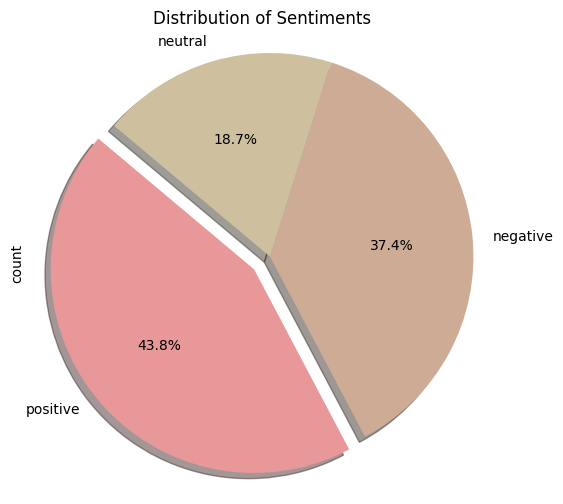

In [65]:
explode = (0.1, 0, 0)  # Explode first slice

# Set the color
color = ['#E89898','#CDAB94','#CEC09E']

# Assuming new_df['Sentiment'] contains categorical data with sentiment labels
new_df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=explode, startangle=140, figsize=(6, 6), shadow=True, colors=color)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Title of the chart
plt.title("Distribution of Sentiments")

# Show the chart
plt.show()


1. **Why did you pick the specific chart?**

* I chose a Pie chart because it is one of the most effective ways to visualize percentage of the data, particularly when comparing the frequency or percentage of distinct categories.

2. **What is/are the insight(s) found from the chart?**
* Positive sentiment of the dataset around 44% is the highest tweets
* negative sentiment of the dataset around 38% is the second highest tweets
* Neutral sentiment of the dataset around 18% is the Lowest tweets



### Chart-2

#### Funnel Chart

In [79]:
#Find Total objects
total_prod = len(new_df['UserName'])

#Find total positive tweets
total_positive = new_df[new_df['Sentiment'] == 'positive'].shape[0]

#Find total negative tweets
total_negative = new_df[new_df['Sentiment'] == 'negative'].shape[0]

#Find the total Neutral tweets
total_neutral = new_df[new_df['Sentiment'] == 'neutral'].shape[0]

#Create the dictionary in total tweets and labels
funnel_1 = dict(
    number = [total_prod, total_positive, total_negative, total_neutral],
    label = ['Total', 'Positive','Negetive', 'Neutral']
)

#Create the plot using plotly
funnel_1_fig = px.funnel(funnel_1, x='number', y='label')

#Show the plot
funnel_1_fig.show()

1. **Why did you pick the specific chart?**
*  I chose a Funnel chart because it is one of the most effective ways to visualize Total tweets of the data, particularly when comparing the frequency or Number of distinct categories.

2. **What is/are the insight(s) found from the chart?**

* Positive sentiment of the dataset around 18k is the highest tweets
* negative sentiment of the dataset around 15k is the second highest tweets
* Neutral sentiment of the dataset around 7.7k is the Lowest tweets


#### Chart-3

#### Bar Chart

In [82]:
# Get top 10 locations
top_10_locations = new_df['Location'].value_counts().reset_index().head(10)
top_10_locations.columns = ['Location', 'Count']  # Renaming columns for clarity

# Define custom colors
custom_colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A',
                 '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']

# Create the bar chart
fig = px.bar(top_10_locations,
             x='Location',
             y='Count',
             title='Top 10 Locations',
             labels={'Count': 'Number of Occurrences', 'Location': 'Location'},
             color='Location',
             color_discrete_sequence=custom_colors)

# Show the chart
fig.show()

1. **Why did you pick the specific chart?**
* I chose a Bar chart because it is one of the most effective ways to visualize Total tweets of the data, particularly when comparing the frequency or Number of distinct categories.
2. **What is/are the insight(s) found from the chart?**
* Highest tweets of the country London and United States
* Average tweets of the country CA, India, UK, Australia

### Chart-4

#### Pie Chart

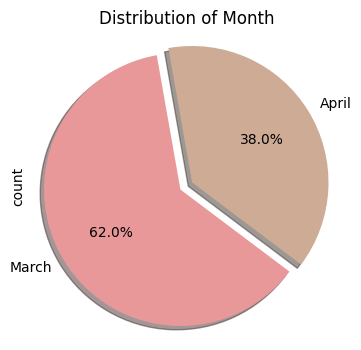

In [85]:
explode = (0.1, 0)  # Explode first slice

# Set the color
color = ['#E89898','#CDAB94']

# Assuming new_df['month'] contains categorical data with month labels
new_df['month'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=explode, startangle=100, figsize=(4, 4), shadow=True, colors=color)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Title of the chart
plt.title("Distribution of Month")

# Show the chart
plt.show()

1. **Why did you pick the specific chart?**
* I chose a Pie chart because it is one of the most effective ways to visualize Total tweets of the Month, particularly when comparing the frequency or Percentage of distinct categories.
2. **What is/are the insight(s) found from the chart?**
* March is highest tweets of the month
* April is Lowest tweets of the month

### Chart-5

### Bar Chart

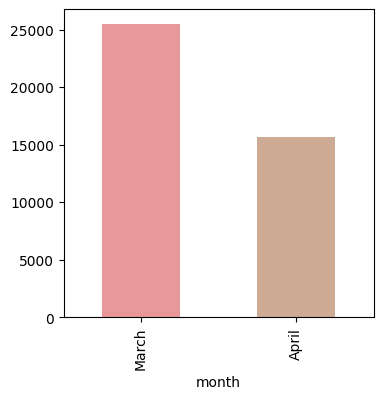

In [87]:
# Set the color
color = ['#E89898','#CDAB94']

# Create the plot
new_df['month'].value_counts().plot(kind='bar', figsize=(4, 4), color=color)

#Show the Chart
plt.show()

1. **Why did you pick the specific chart?**
* I chose a Bar chart because it is one of the most effective ways to visualize Total tweets of the Month, particularly when comparing the frequency or Number of distinct categories.
2. **What is/are the insight(s) found from the chart?**
* March is highest tweets of the month
* April is Lowest tweets of the month

### Chart-6

#### Bar Plot and Scatter Plot

#### Bar Plot

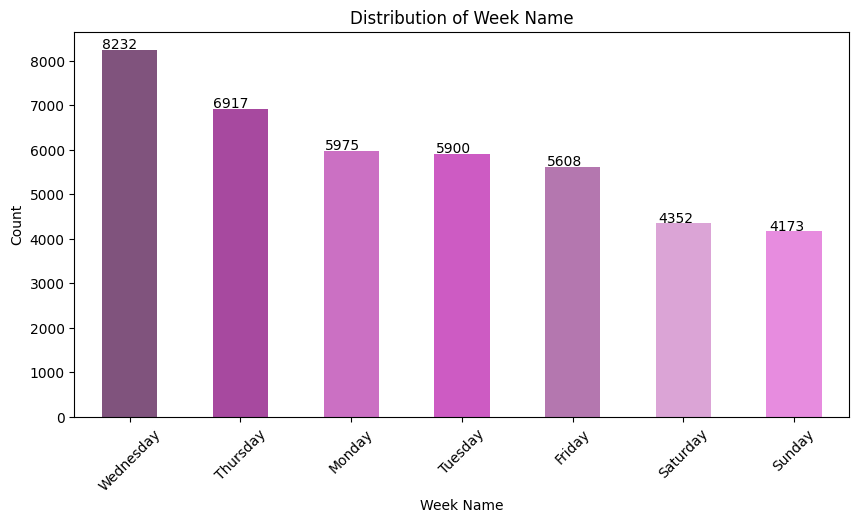

In [92]:
#Set The custom color
color = ['#80537D','#A7499F','#CB70C3','#CD5BC3','#B477AF','#DBA4D6','#E78CDF']

#Create the chart
ax = new_df['week_name'].value_counts().plot(kind = 'bar', figsize=(10, 5), color=color)

# Add labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# set the Titale
plt.title('Distribution of Week Name')

#Set The X label
plt.xlabel('Week Name')

# set The Y label
plt.ylabel('Count')

# set the X label rotation
plt.xticks(rotation=45)

# Show the chart
plt.show()

### Chart -7

### Scatter Plot

In [93]:
# Get the value counts for 'week_name'
week_name_counts = new_df['week_name'].value_counts().reset_index()
week_name_counts.columns = ['week_name', 'Count']  # Rename columns for clarity

# Create a scatter plot
fig = px.scatter(week_name_counts,
                 x='week_name',
                 y='Count',
                 title='Scatter Plot of Week Names vs. Counts',
                 labels={'week_name': 'Week Name', 'Count': 'Number of Occurrences'})

# Show the plot
fig.show()

### Chart-8

###### Line Chart

In [95]:
# Get the value counts for 'week_name'
week_name_counts = new_df['week_name'].value_counts().reset_index()
week_name_counts.columns = ['week_name', 'Count']  # Rename columns for clarity

# Create a line chart
fig = px.line(week_name_counts,
              x='week_name',
              y='Count',
              title='Line Chart of Week Names vs. Counts',
              labels={'week_name': 'Week Name', 'Count': 'Number of Occurrences'})

# Show the plot
fig.show()

1. **Why did you pick the specific chart?**
* I chose a Bar chart and Scatter Plot because it is one of the most effective ways to visualize Total tweets of the days Name, particularly when comparing the frequency or Number of distinct categories.
2. **What is/are the insight(s) found from the chart?**
* Wednesday is highest tweets of the Days
* Saturday and Sunday are Lowest tweets of the Days

### Chart-9

###### Stack Bar Plot

In [97]:
# Get the top 15 most frequent locations
top_15_locations = new_df['Location'].value_counts().nlargest(15).index

# Filter the grouped data for only the top 15 locations
sentiment_location_counts = new_df[new_df['Location'].isin(top_15_locations)].groupby(['Sentiment', 'Location']).size().reset_index(name='Count')

# Create a stacked bar chart for the top 15 locations
fig = px.bar(sentiment_location_counts,
             x='Location',
             y='Count',
             color='Sentiment',
             title='Top 15 Location Counts by Sentiment',
             labels={'Count': 'Number of Occurrences', 'Location': 'Location'},
             barmode='stack')  # Stacked bar chart

# Show the chart
fig.show()

1. **Why did you pick the specific chart?**
* I chose a Stack Bar chart because it is one of the most effective ways to visualize Total tweets of the Location Name ( Country ), particularly when comparing the frequency or Number of distinct categories.
2. **What is/are the insight(s) found from the chart?**
* Positive tweets of the all country  
* Negative tweets of the some country

### Chart-10

##### Scatter Plot

In [98]:
# Get the top 15 most frequent locations
top_15_locations = new_df['Location'].value_counts().nlargest(15).index

# Filter the grouped data for only the top 15 locations
sentiment_location_counts = new_df[new_df['Location'].isin(top_15_locations)].groupby(['Sentiment', 'Location']).size().reset_index(name='Count')

# Create a scatter plot for the top 15 locations
fig = px.scatter(sentiment_location_counts,
                 x='Location',
                 y='Count',
                 color='Sentiment',
                 size='Count',  # Bubble size based on count
                 title='Top 15 Locations by Sentiment',
                 labels={'Count': 'Number of Occurrences', 'Location': 'Location'})

# Show the chart
fig.show()

1. **Why did you pick the specific chart?**
* I chose a Scatter plot because it is one of the most effective ways to visualize Total tweets of the Location Name ( Country ), particularly when comparing the frequency or Number of distinct categories.
2. **What is/are the insight(s) found from the chart?**
* Positive tweets of the all country  
* Negative tweets of the some country

### Chart-11

#### stacked area chart

In [99]:
# Group by 'month' and 'Sentiment', then count occurrences
month_sentiment_counts = new_df.groupby(['month', 'Sentiment']).size().reset_index(name='Count')

# Create a stacked area chart
fig = px.area(month_sentiment_counts,
              x='month',
              y='Count',
              color='Sentiment',
              title='Sentiment Distribution by Month',
              labels={'month': 'Month', 'Count': 'Number of Occurrences'})

# Show the chart
fig.show()

1. **Why did you pick the specific chart?**
*  Stacked Area Chart is best for analyzing trends over time (how sentiments change month by month).
* I chose a Stack Area Chart because it is one of the most effective ways to visualize Total tweets of the Month by, particularly when comparing the frequency or Number of distinct categories.
2. **What is/are the insight(s) found from the chart?**
* March Month of the Highest tweets
* April Month of the Average tweets

### Chart-12

#### grouped bar chart

In [100]:
# Group by 'week_name' and 'Sentiment', then count occurrences
week_sentiment_counts = new_df.groupby(['week_name', 'Sentiment']).size().reset_index(name='Count')

# Create a grouped bar chart
fig = px.bar(week_sentiment_counts,
             x='week_name',
             y='Count',
             color='Sentiment',
             title='Sentiment Distribution by Week',
             labels={'week_name': 'Week Name', 'Count': 'Number of Occurrences'},
             barmode='group')  # Grouped bar chart

# Show the chart
fig.show()

1. **Why did you pick the specific chart?**
*  Grouped Bar Chart is useful if you prefer a clear comparison of sentiment counts across weeks.
* I chose a Grouped Bar Chart because it is one of the most effective ways to visualize Total tweets of the Days by, particularly when comparing the frequency or Number of distinct categories.
2. **What is/are the insight(s) found from the chart?**
* Positive tweets of the all days of the Highest.
* Neutral tweets of the all days of the Lowest.

### Chart-13

#### heatmap

In [101]:
# Group by 'month' and 'week_name', then count occurrences, and unstack sentiment values
heatmap_data = new_df.groupby(['month', 'week_name'])['Sentiment'].value_counts().unstack().fillna(0)

# Sample 10 random rows
heatmap_data_sample = heatmap_data.sample(10)

# Create the heatmap
fig = px.imshow(heatmap_data_sample,
                title='Heatmap of Sentiment Distribution by Month and Week (Sample of 10)',
                labels={'x': 'Week Name', 'y': 'Month', 'color': 'Count'},
                color_continuous_scale='Viridis')

# Show the chart
fig.show()

1. **Why did you pick the specific chart?**
*  Generates the heatmap, with colors representing the count of sentiments.
* I chose a HeatMap because it is one of the most effective ways to visualize Total tweets of the Sentiment by, particularly when comparing the frequency or Number of distinct categories.
2. **What is/are the insight(s) found from the chart?**
* Highest Tweets of the Positive.
* Lowest Tweets of the Negetive.

### Chart-14

#### Line Plot

In [102]:
# Group by 'month' and 'week_name', then count occurrences, and unstack sentiment values
line_plot_data = new_df.groupby(['month', 'week_name'])['Sentiment'].value_counts().unstack().fillna(0)

# Sample 10 random rows
line_plot_data_sample = line_plot_data.sample(10).reset_index()

# Melt the DataFrame to fit px.line format
line_plot_data_melted = line_plot_data_sample.melt(id_vars=['month', 'week_name'], var_name='Sentiment', value_name='Count')

# Create the line plot
fig = px.line(line_plot_data_melted,
              x='week_name',
              y='Count',
              color='Sentiment',
              facet_row='month',
              title='Sentiment Trends by Month and Week (Sample of 10)',
              labels={'week_name': 'Week Name', 'Count': 'Number of Occurrences', 'month': 'Month'},
              markers=True)

# Show the chart
fig.show()

1. **Why did you pick the specific chart?**
*  Line Plot creates the line plot, with different lines for each sentiment and facets (subplots) for each month.
* I chose a Line Plot because it is one of the most effective ways to visualize Total tweets of the Each Month, particularly when comparing the frequency or Number of distinct categories.
2. **What is/are the insight(s) found from the chart?**
* Highest Tweets of the Positive.
* Lowest Tweets of the Negetive.

### Chart-15

#### Bubble Plot

In [103]:
# Group by 'month' and 'week_name', then count occurrences, and unstack sentiment values
bubble_plot_data = new_df.groupby(['month', 'week_name'])['Sentiment'].value_counts().unstack().fillna(0)

# Sample 10 random rows
bubble_plot_data_sample = bubble_plot_data.sample(10).reset_index()

# Melt the DataFrame to fit px.scatter format
bubble_plot_data_melted = bubble_plot_data_sample.melt(id_vars=['month', 'week_name'], var_name='Sentiment', value_name='Count')

# Create the bubble plot
fig = px.scatter(bubble_plot_data_melted,
                 x='week_name',
                 y='month',
                 size='Count',
                 color='Sentiment',
                 title='Bubble Plot of Sentiment Distribution by Month and Week (Sample of 10)',
                 labels={'week_name': 'Week Name', 'month': 'Month', 'Count': 'Number of Occurrences'},
                 size_max=50)  # Adjust the maximum size of bubbles

# Show the chart
fig.show()

1. **Why did you pick the specific chart?**
*  This bubble plot provides a visual representation where the size of each bubble indicates the volume of sentiments, allowing you to easily spot high and low sentiment areas across different weeks and months.
2. **What is/are the insight(s) found from the chart?**
* Highest Tweets of the Positive.
* Lowest Tweets of the Negetive.

### Chart-16

#### sunburst chart

In [104]:
# Group by 'month' and 'week_name', then count occurrences
sunburst_data = new_df.groupby(['month', 'week_name', 'Sentiment']).size().reset_index(name='Count')

# Create the sunburst chart
fig = px.sunburst(sunburst_data,
                  path=['month', 'week_name', 'Sentiment'],
                  values='Count',
                  title='Sentiment Distribution by Month and Week',
                  labels={'Count': 'Number of Occurrences', 'month': 'Month', 'week_name': 'Week Name', 'Sentiment': 'Sentiment'})

# Show the chart
fig.show()

1. **Why did you pick the specific chart?**
*  The sunburst chart provides a hierarchical view of sentiment distribution across different weeks and months, offering insights into how sentiments are distributed and related within the hierarchy of time periods.
2. **What is/are the insight(s) found from the chart?**
* Highest Tweets of the Positive.
* Lowest Tweets of the Negetive.

### Chart-17

#### Heatmap

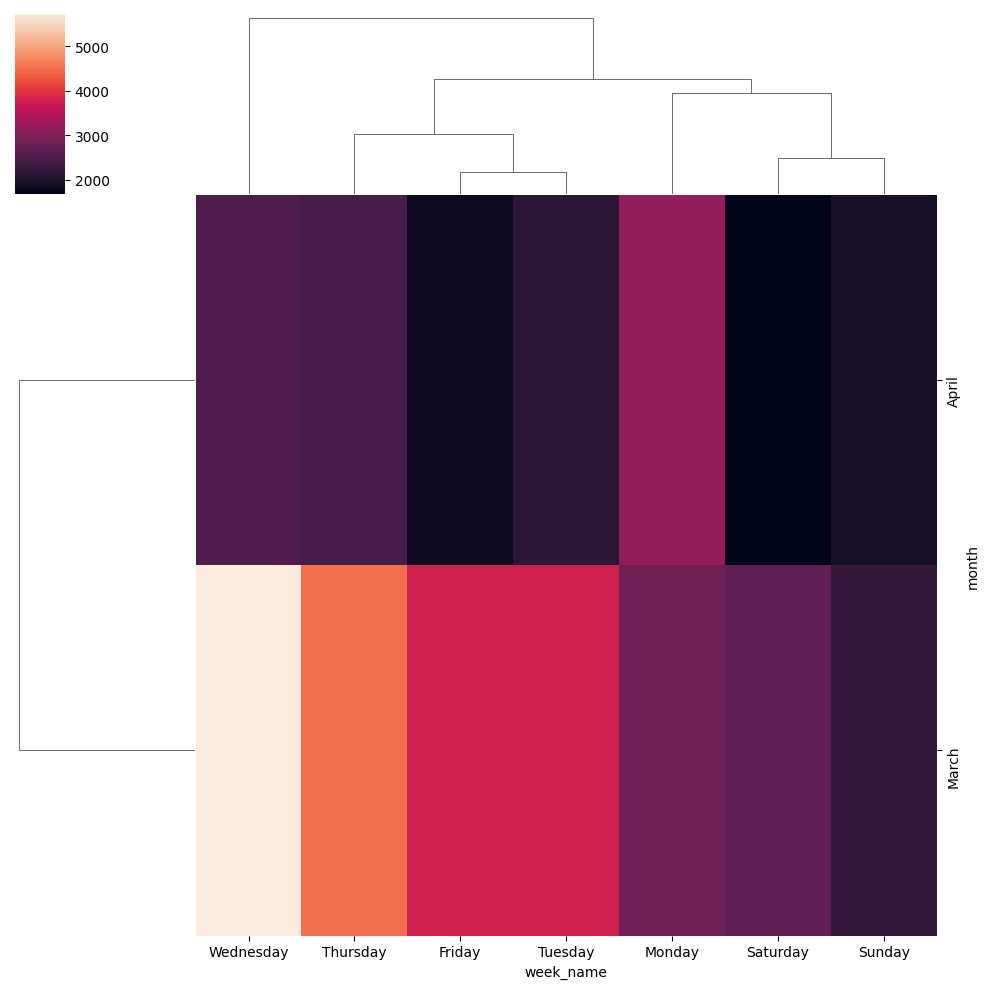

In [106]:
# Create the Cluster Map
sns.clustermap(pd.crosstab(new_df['month'], new_df['week_name'])) # Bie-Variant Analysis

#Show the chart
plt.show()

### Chart-18

#### Correlation

In [153]:
new_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'year', 'month', 'week', 'quarter', 'week_name'],
      dtype='object')

In [158]:
# Correlation Heatmap visualization code
df_numeric = new_df[['ScreenName','week','Sentiment']]
df_numeric.corr()

,ScreenName,week,Sentiment
ScreenName,1.000000,-0.011151,-0.007200
week,-0.011151,1.000000,-0.002308
Sentiment,-0.007200,-0.002308,1.000000


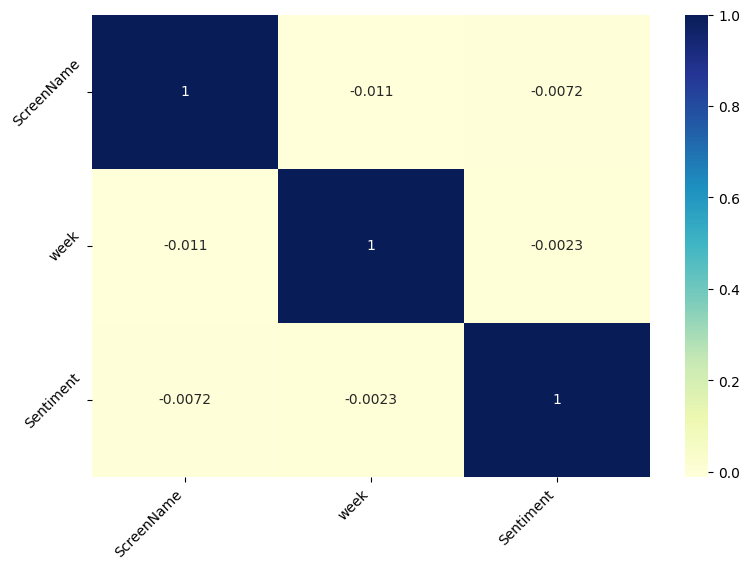

In [159]:
# Correlation Heatmap visualization code
plt.figure(figsize=(9, 6))

dataplot = sns.heatmap(df_numeric.corr(), cmap="YlGnBu", annot=True) # Multivariant analysis

plt.xticks(rotation=45, ha='right')

plt.yticks(rotation=45, ha='right')

# displaying heatmap
plt.show()

1. Why did you pick the specific chart?
By above haetmap it visulaize that pickup_month and dropp off month is 100% correlated.Along with pickup hour ,dropoff hour,pickup weekday and dropoff week day,trip duration and trip duration in minute are highly correlated.

A correlation heatmap visually represents the strength and direction of relationships between variables. Positive correlations are typically shown in one color (e.g., blue), while negative correlations are shown in another (e.g., red). The intensity of the color indicates the strength of the correlation.

* Identify Strong Relationships
* Detect Multicollinearity
* Simplify Complex Data
* Highlight Anomalies
* Easy Interpretation
2. What is/are the insight(s) found from the chart?
* **High Positive Correlation:** Variables that are strongly positively correlated (e.g., a correlation coefficient close to +1) indicate that as one variable increases, the other tends to increase as well. This might suggest a direct relationship.
* **High Negative Correlation:** Variables with a strong negative correlation (e.g., close to -1) indicate that as one variable increases, the other tends to decrease. This could indicate an inverse relationship.
* **Low or No Correlation:** Variables with correlations near 0 have little to no linear relationship, suggesting they might be independent of each other.
* **Multicollinearity:** Identifying pairs of variables that are highly correlated with each other might indicate multicollinearity, which can affect model performance.

### Chart-19

#### Pairplot

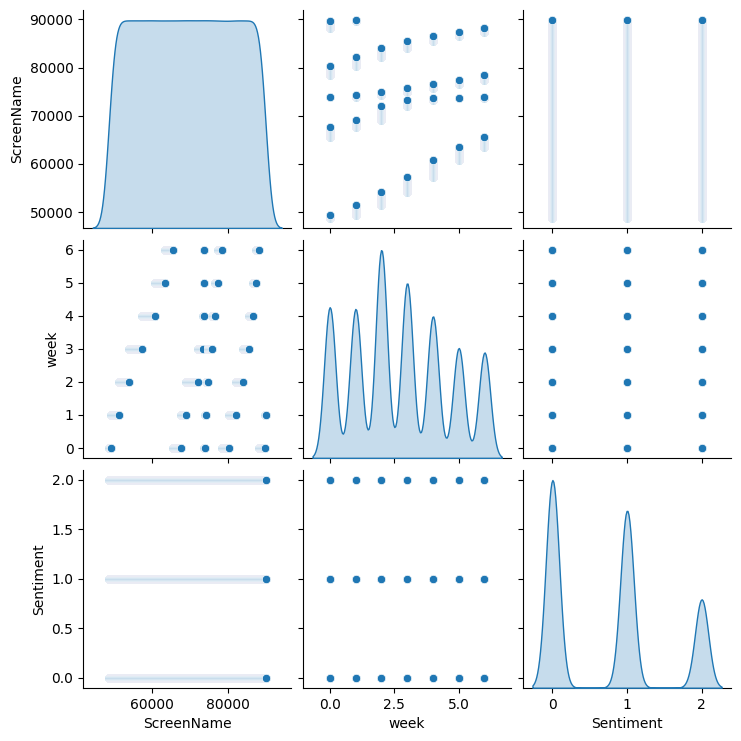

In [160]:
# Pair Plot visualization code
sns.pairplot(df_numeric, diag_kind="kde", palette='YlGn', height=2.5)
plt.show()

1. Why did you pick the specific chart?

* **Identify Relationships**: Pair plots help in identifying relationships (linear or non-linear) between different features. By plotting every feature against every other feature, you can quickly see if there’s a strong correlation.

* **Detect Outliers**: They are useful for detecting outliers, which might skew your analysis or model training. Outliers often stand out clearly in a pair plot.

* **Understand Data Distribution**: The diagonal of a pair plot often shows the distribution of each variable, helping you understand the data's spread and any skewness.

* **Multivariate Analysis:** Pair plots provide a compact view of the entire dataset, allowing you to assess interactions between variables in a multivariate context, which is particularly useful in exploratory data analysis (EDA).

2. What is/are the insight(s) found from the chart?

* **Linear Relationship:** If two variables show a straight-line pattern, it suggests a linear relationship. For example, if the scatterplot between two variables forms a line from the bottom left to the top right, there is a positive linear correlation.

* **Non-linear Relationship:** Curved patterns may indicate non-linear relationships. For instance, a parabolic shape suggests a quadratic relationship between the variables.

* **No Relationship:** A random scatter of points with no discernible pattern indicates no significant relationship between the variables.

* **Outliers:** Points that are distant from the rest of the data in any of the scatterplots may be outliers. These can affect statistical analyses and model performance, so identifying them is crucial.

* **Skewness:** The diagonal plots (usually histograms or kernel density estimates) show the distribution of individual variables. A skewed distribution might suggest the need for transformation, such as logarithmic scaling.

* **Bimodal Distribution:** If a diagonal plot shows two peaks, it might indicate a bimodal distribution, which could suggest the presence of two different populations within the data.

### Chart-20

### checking skewness of target variable

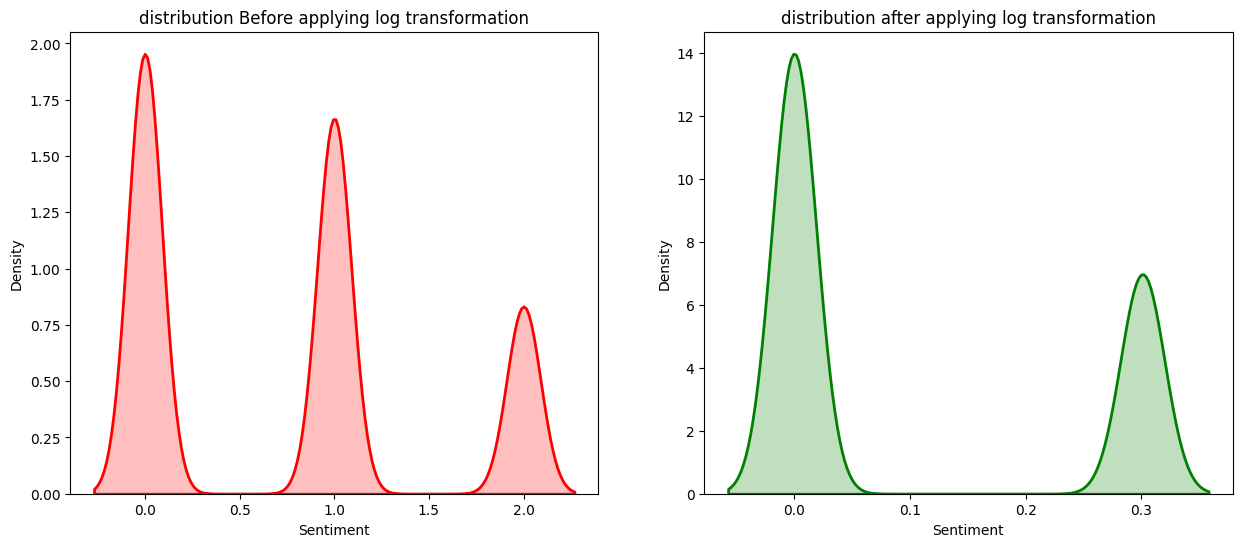

In [146]:
# dist plot of trip duration.
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))

#Create the displot old data
sns.distplot(covid.Sentiment,color='red',ax=ax[0],hist=False,kde_kws= {'shade':True, 'linewidth':2})

#Create the displot new data
sns.distplot(np.log10(covid["Sentiment"]),color='green',ax=ax[1],hist= False,kde= True,kde_kws= {'shade':True, 'linewidth':2})

#Set the title Before
ax[0].set_title("distribution Before applying log transformation")

#Set the title After
ax[1].set_title("distribution after applying log transformation")

#Show the chart
plt.show()

### **Feature Engineering & Data Pre-processing**

In [117]:
# Remove empty string ""
new_df = new_df[new_df['OriginalTweet'] != '']

In [119]:
new_df['OriginalTweet'] = new_df['OriginalTweet'].str.strip()

In [134]:
### Check the null value in Independet feature and dependent feature
#Assigne the Featur and dependent data
Idf_df = ['OriginalTweet', 'Sentiment']

#Create the dataframe
id_df = new_df[Idf_df]

#Check the null values
id_df.isnull().sum()

,0
OriginalTweet,0
Sentiment,0


#### No null values or missing data in the dataset

In [136]:
### Check the Duplicate values
new_df.duplicated().sum()

0

#### No Duplicate values in the dataset

###### **ONE HOT ENCODING**

In [137]:
#Defined function for one hot encoding
def one_hot_encoding(x):
  if x == 'positive':
    return 0
  elif x == 'negative':
    return 1
  else:
    return 2

In [138]:
### Apply the function
new_df['Sentiment'] = new_df['Sentiment'].apply(one_hot_encoding)

1. OneHotEncoder method use for categorical dataset

* OneHotEncoder transforms a categorical column into multiple binary columns, where each column represents one category, and the value is 1 if the instance belongs to that category, otherwise 0.

*  ome algorithms (like linear models) may perform better with one-hot encoded data because it makes the data easier to interpret and eliminates any implicit ordinal relationship between categories.

In [139]:
## After Encoding data check
new_df['Sentiment'].value_counts()

,count
Sentiment,
0,18044
1,15397
2,7682


######  **Feature Manipulation & Selection**

###### **Manipulation**

In [140]:
#Choose columns name as per requirement for model
column = ['OriginalTweet', 'Sentiment']

#Create the data frame
covid = new_df[column]

In [141]:
#After Selction check the data shape
covid.shape

(41123, 2)

In [142]:
#Data Information
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41123 entries, 1 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41123 non-null  object
 1   Sentiment      41123 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


##### **Feature Selection**

In [147]:
#Select the Independent feature
x = covid['OriginalTweet']

#Select the Dependent feature
y = covid['Sentiment']

In [150]:
## Print the feature data
print(f'Independent feature: {x.shape}')
print(f'Dependent feature: {y.shape}')

Independent feature: (41123,)
Dependent feature: (41123,)


1. Dependent columns select for prediction
2. Independent columns select for test

#### **Data Splitting**

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [152]:
#Print the train and test data
print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

x_train: (32898,)
x_test: (8225,)
y_train: (32898,)
y_test: (8225,)


* 80 , 20 percente choose the ratio
* large dataset so choose 20 and 80 percent